<a href="https://colab.research.google.com/github/blancavazquez/diplomado_IA/blob/main/notebooks/Tema_01/01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 11: Introducción a las redes neuronales
# Tema 1: Neuronas artificiales
## Perceptrón

El objetivo de esta libreta esta crear un perceptrón y evaluar funciones de activación. En esta libreta aprendemos:

1.   Construir un perceptrón (from-scratch)
2.   Construir un clasificador con una función escalón
3.   Evaluar funciones de activación en la tarea de clasificación

In [ ]:
#Carga de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
np.random.seed(3)

## Paso 1: generar datos sintéticos

Para la generación de datos se usará la función de [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) de la biblioteca de scikit - learn.

Los pasos a seguir son:

1.   Indicar número de clases a generar
2.   Ejecutar un generador de datos (make_clasification)



In [ ]:
#número de clases que deseamos generar
num_clases = 2

#Generación de datos
datos, etiqueta = make_classification(n_samples = 100,
                                  n_features=2,
                                  n_redundant=0,
                                  n_informative=2,
                                  n_clusters_per_class=1,
                                  class_sep=5)

#Asignación de los datos
clases = [datos[etiqueta==i] for i in range(num_clases)]

In [ ]:
print("Tamaño de los datos: ", datos.shape)
print("Clases: ", len(clases))

Tamaño de los datos:  (100, 2)
Clases:  2


In [ ]:
#Visualizando los datos generados
etiqueta

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

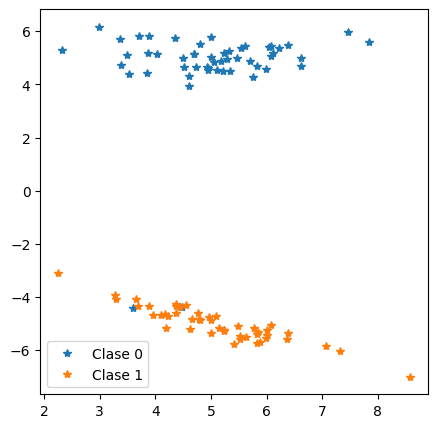

In [ ]:
def plot_datos(classes, ax=None, figsize=(5,5)):
    """
    función para visualizar los datos sintéticos generados
    Args:
    classes: int (indica el número de clases presentes en los datos)
    """
    if ax is None:
        _, axis = plt.subplots(figsize=figsize)
    else:
        axis = ax
    for i, c in enumerate(classes):
        axis.plot(c[:, 0], c[:, 1], '*', label=f'Clase {i}')
    plt.legend()
    if ax is None:
        plt.show()

plot_datos(clases)

## Paso 2: dibujar una línea de separación entre los datos

In [ ]:
def separar_datos(w, b, inter=(np.min(datos[:, 0]),np.max(datos[:, 0]))):
    x = np.linspace(*inter)
    y = w*x + b # Forma ordenada-pendiente
    return x, y

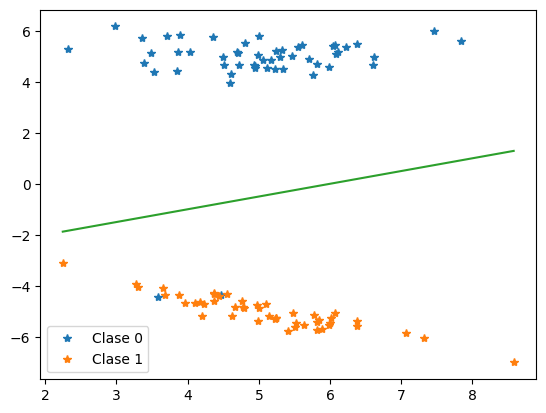

In [ ]:
parametros = 0.5, -3 # peso (w), sesgo (b)
_, ax = plt.subplots()
plot_datos(clases, ax)
ax.plot(*separar_datos(*parametros))
plt.show()

## Paso 3: añadir un nuevo dato

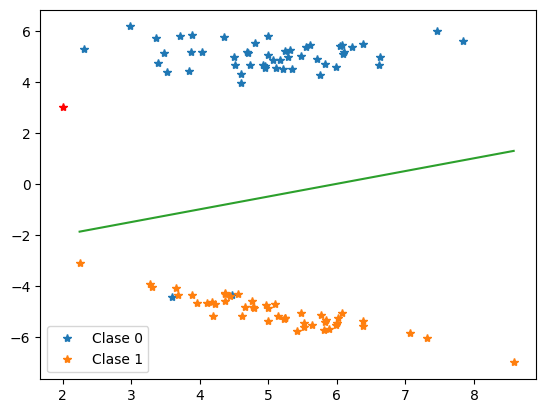

¿En qué clase cae el nuevo dato?


In [ ]:
punto = 2,3
_, ax = plt.subplots()
plot_datos(clases, ax)
ax.plot(*separar_datos(*parametros))
ax.plot(*punto, 'r*')
plt.show()

print("¿En qué clase cae el nuevo dato?")

## Paso 4: clasificando datos

In [ ]:
def clasificar(a,b, x, y):
   #Cambiando la expresión de la recta a la forma general y -ax -b = 0
  return y - a*x - b


clasificar(parametros[0],parametros[1], punto[0], punto[1]) #Si funciones de activación, el perceptrón únicamente haría una función lineal

5.0

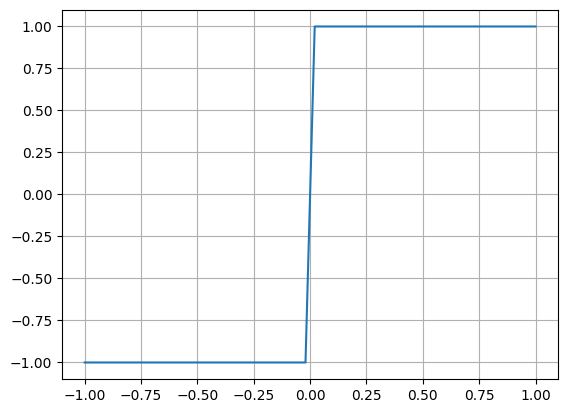

In [ ]:
# Función paso
def funcion_escalon(y):
    return y / np.abs(y)

plt.plot()
x_paso = np.linspace(-1,1)
plt.plot(x_paso, funcion_escalon(x_paso))
plt.grid()
plt.show()

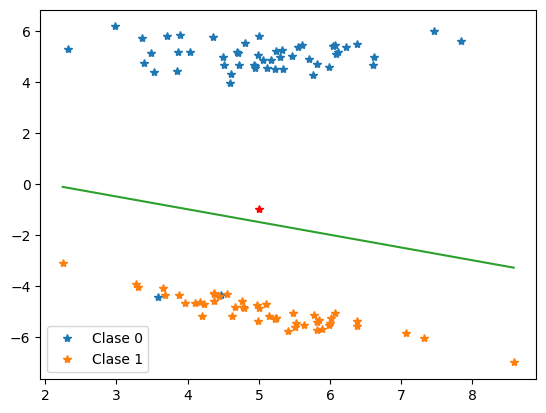

El punto (5, -1) pertenece a la clase 1.0


In [ ]:
def clasificacion(a,b, x, y):
    return funcion_escalon(y - (a*x + b))

parametros = -0.5, 1 # a , b
punto = 5, -1  # x , y
_, ax = plt.subplots()
plot_datos(clases, ax)
ax.plot(*separar_datos(*parametros))
ax.plot(*punto, 'r*')
plt.show()

clase = clasificacion(parametros[0],parametros[1], punto[0], punto[1])
print(f'El punto {punto} pertenece a la clase {clase}')

## Paso 5: funciones de activación

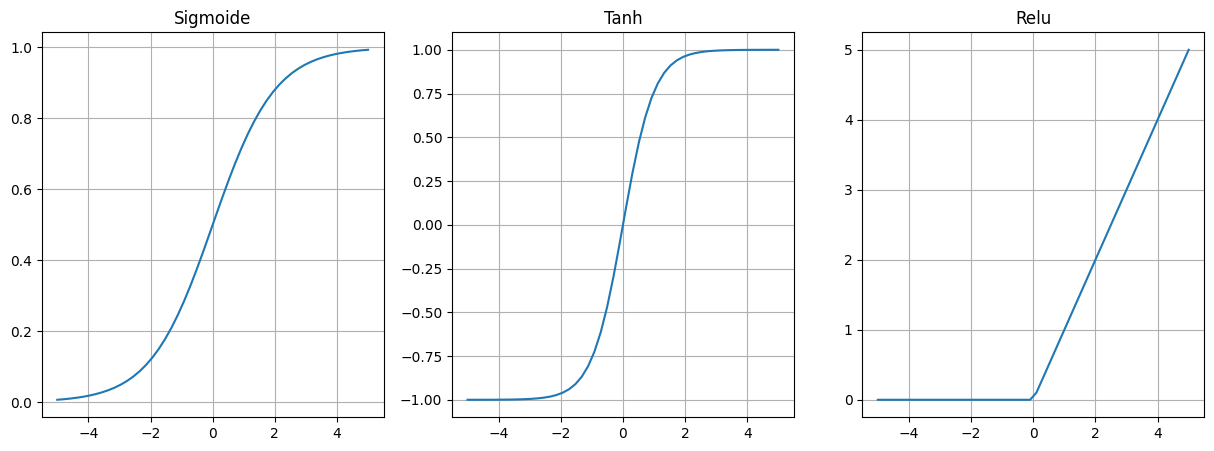

In [ ]:
def sigmoide(z):
    return 1 / ( 1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

z = np.linspace(-5,5)
_, axs = plt.subplots(1,3, figsize=(15,5))
for f, title, ax in zip([ sigmoide,   tanh,   relu],
                        ['Sigmoide', 'Tanh', 'Relu'],
                        axs):
    ax.plot(z, f(z))
    ax.grid()
    ax.set_title(title)


plt.show()

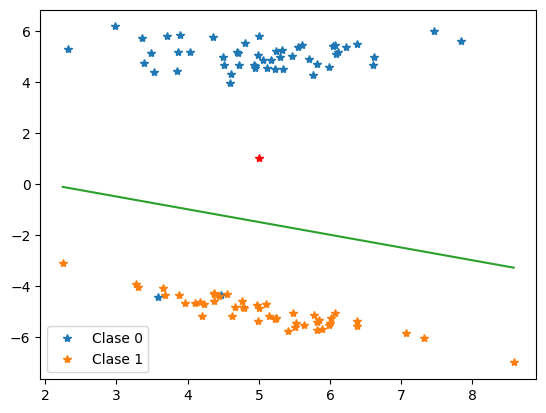

El punto (5, 1) percenece a la clase [[0.92414182]]


In [ ]:
#Vectorizando las operaciones
# -b + -ax  + y = 0
# w0 + w1*x + w2*y = 0
# w0*x0 + w1*x1 + w2*x2 = 0

def generar_linea_vec(W, inter=(np.min(datos[:, 0]), np.max(datos[:, 0]))):
    ws = -(W/W[-1])[:2]
    x = np.linspace(*inter)
    X = np.array([np.ones_like(x), x])
    return x, np.dot(ws.T, X)[0]

def visualizar_datos(X, W):
    _, ax = plt.subplots()
    plot_datos(clases, ax)
    ax.plot(*generar_linea_vec(W))
    ax.plot(X[1], X[2], 'r*')
    plt.show()

def visualizar_datos(W=None, X=None, devolver_ax = False):
    _, ax = plt.subplots()
    plot_datos(clases, ax)
    if W is not None: ax.plot(*generar_linea_vec(W))
    if X is not None: ax.plot(X[1], X[2], 'r*')
    if devolver_ax:
        return ax
    else:
        plt.show()

def clasificador_matrices(X, W, activacion=sigmoide):
    return activacion(np.dot(W.T, X))

parametros = -0.5, 1 # a , b
punto = 5, 1  # x , y

W = np.array([[-parametros[1]], #w0
              [-parametros[0]], #w1
              [1]])#w2
X = np.array([[1], #x0
              [punto[0]], #x1 - x
              [punto[1]]])#x2 - y

visualizar_datos(W, X)

print(f'El punto {punto} percenece a la clase {clasificador_matrices(X,W , sigmoide)}')